IMPORTING THE DATASET 1 : IMDB TOP 1000 MOVIES

In [2]:
import pandas as pd 
file = "imdb_top_1000.csv"
movies_df = pd.read_csv(file)
movies_df.head(5)

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

CLEANING AND FILLING THE NON INTEGER VALUES

In [3]:
# Check for missing values
missing_values = movies_df.isna().sum()
missing_values


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [4]:

# Fill missing values
movies_df['Certificate'].fillna('UA', inplace=True)
movies_df['Meta_score'].fillna(movies_df['Meta_score'].median(), inplace=True)
movies_df['Gross'].fillna(movies_df['Gross'].mode(), inplace=True)

# Confirm missing values have been handled
movies_df.isna().sum()


/tmp/ipykernel_2414/477679677.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df['Certificate'].fillna('UA', inplace=True)
/tmp/ipykernel_2414/477679677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

DATA ANALYSIS

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
summary_stats = movies_df.describe()


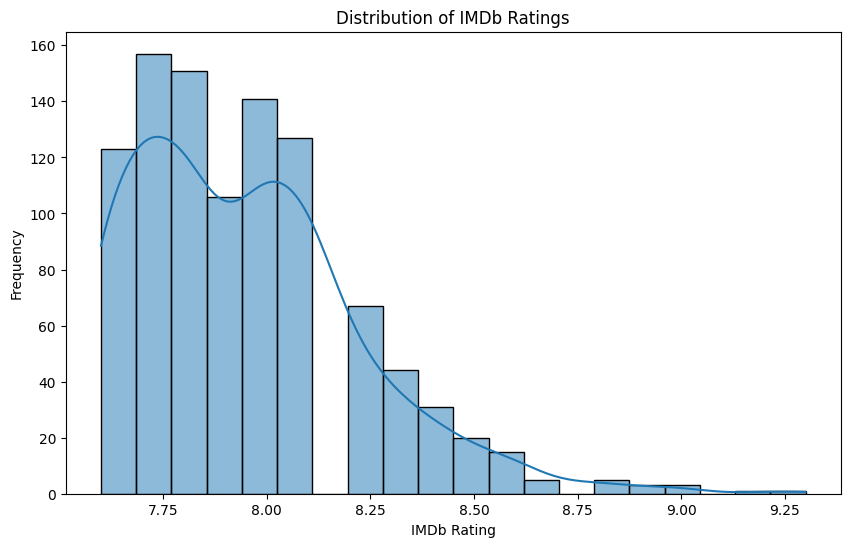

In [6]:

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

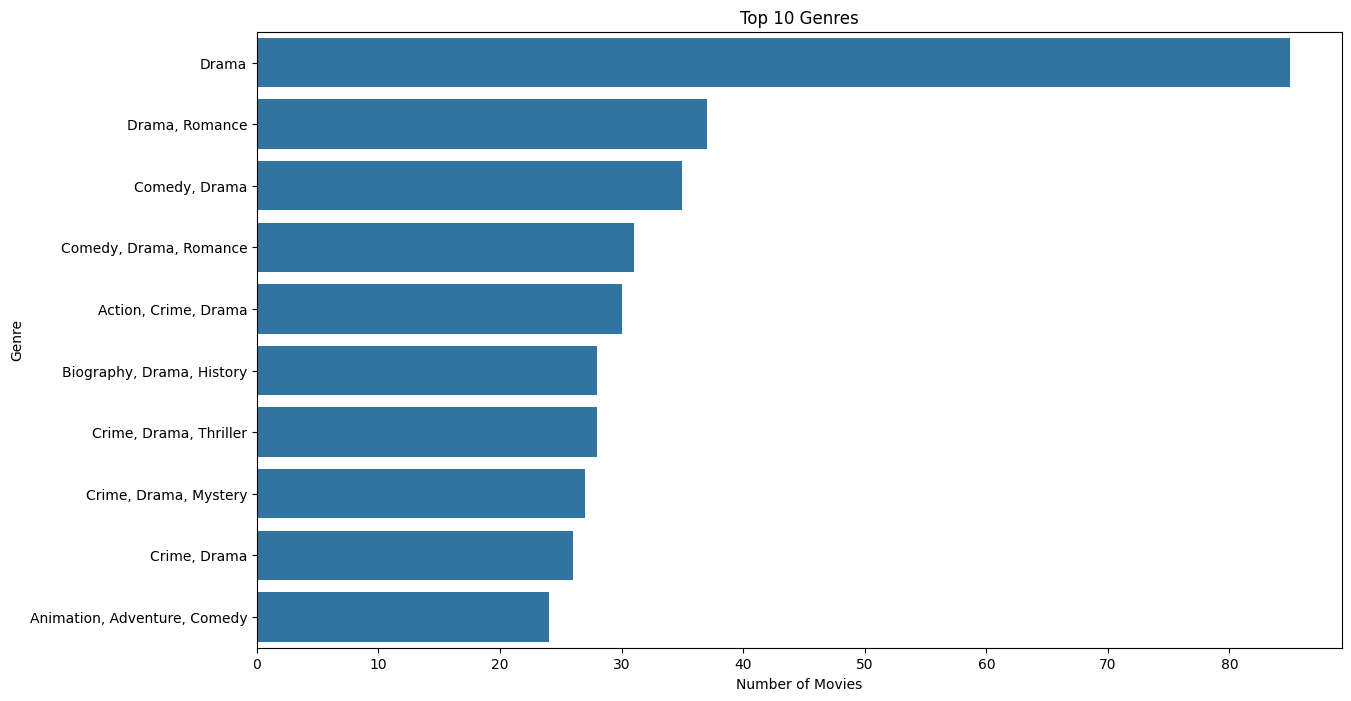

In [7]:
plt.figure(figsize=(14, 8))
genre_counts = movies_df['Genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


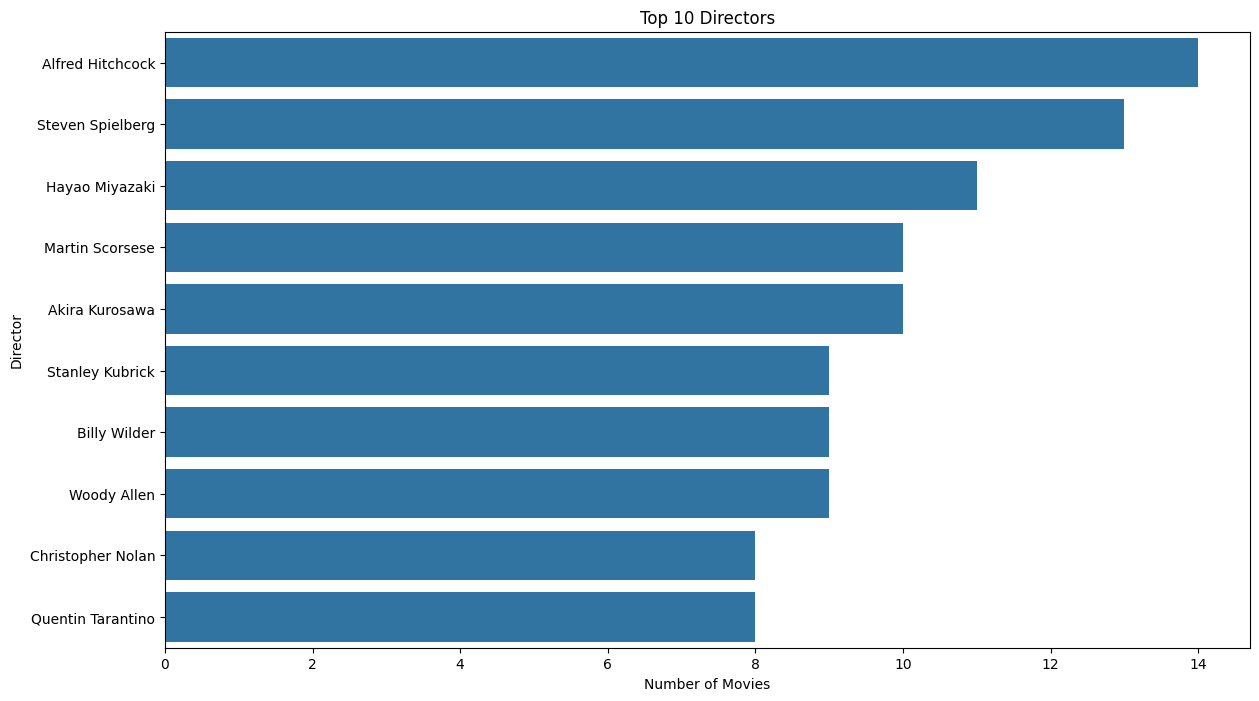

In [8]:
plt.figure(figsize=(14, 8))
director_counts = movies_df['Director'].value_counts().head(10)
sns.barplot(x=director_counts.values, y=director_counts.index)
plt.title('Top 10 Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


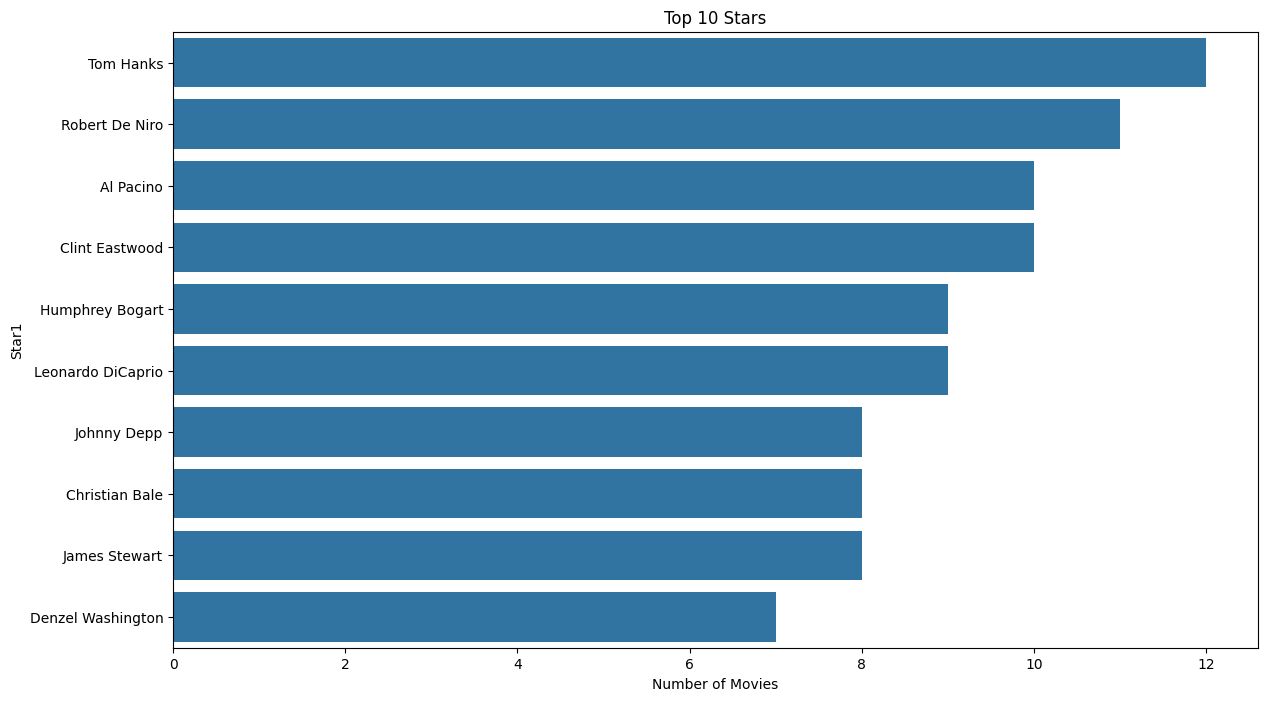

In [9]:
plt.figure(figsize=(14, 8))
star1_counts = movies_df['Star1'].value_counts().head(10)
sns.barplot(x=star1_counts.values, y=star1_counts.index)
plt.title('Top 10 Stars')
plt.xlabel('Number of Movies')
plt.ylabel('Star1')
plt.show()

1.USING RANDOM FOREST CLASSIFIER TO PREDICT THE IMDB RATING OF THE MOVIE 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from fuzzywuzzy import process
import pandas as pd

# Load the dataset
data_path = 'imdb_top_1000.csv'
movies_df = pd.read_csv(data_path)

# Encode categorical variables
label_encoder_director = LabelEncoder()
label_encoder_star1 = LabelEncoder()
movies_df['Director'] = label_encoder_director.fit_transform(movies_df['Director'])
movies_df['Star1'] = label_encoder_star1.fit_transform(movies_df['Star1'])

# Prepare the data for regression
X = movies_df[['Director', 'Star1', 'Meta_score']]
y = movies_df['IMDB_Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the regression model
reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


# Function to find the closest match using fuzzy matching
def find_closest_match(input_name, choices):
    match, score = process.extractOne(input_name, choices)
    return match

# Function to take user input and predict IMDb rating
def predict_imdb_rating(director, star1, meta_score):
    closest_director = find_closest_match(director, label_encoder_director.classes_)
    closest_star1 = find_closest_match(star1, label_encoder_star1.classes_)
    
    example_director = label_encoder_director.transform([closest_director])[0]
    example_star1 = label_encoder_star1.transform([closest_star1])[0]
    example_data = [[example_director, example_star1, meta_score]]
    predicted_rating = reg_model.predict(example_data)
    
    return predicted_rating[0], closest_director, closest_star1


# Example usage
user_director = input("Enter the director's name: ")
user_star1 = input("Enter the hero's name: ")
user_meta_score = float(input("Enter the meta score: "))

predicted_rating, closest_director, closest_star1 = predict_imdb_rating(user_director, user_star1, user_meta_score)

print(f"Predicted IMDb Rating: {predicted_rating}")
print(f"Closest Director: {closest_director}")
print(f"Closest Hero: {closest_star1}")


Mean Squared Error: 0.0705877173188132
Mean Squared Error: 0.0705877173188132
R^2 Score: -0.1011437245540554
Predicted IMDb Rating: 8.274500000000007
Closest Director: Francis Ford Coppola
Closest Hero: Al Pacino


/var/data/python/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error: 0.0705877173188132
R-squared: -0.1011437245540554


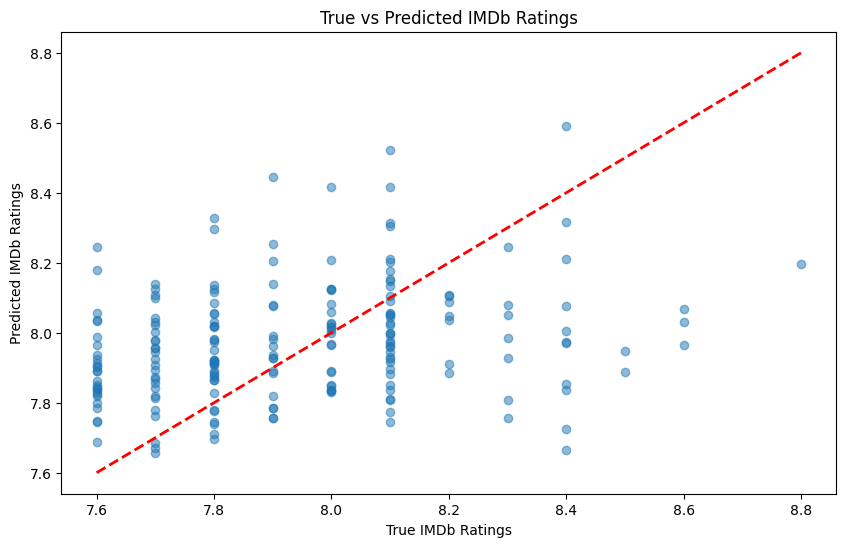

In [15]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the true vs predicted IMDb ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Line for perfect prediction
plt.xlabel('True IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.title('True vs Predicted IMDb Ratings')
plt.show()


2.USING KNN TO SUGGEST MOVIES BASED ON USERS TASTE

In [11]:
from sklearn.neighbors import NearestNeighbors

# Prepare the data for KNN
movies_df['Genres_List'] = movies_df['Genre'].apply(lambda x: x.split(','))
genre_list = list(set([item for sublist in movies_df['Genres_List'] for item in sublist]))
for genre in genre_list:
    movies_df[genre] = movies_df['Genres_List'].apply(lambda x: 1 if genre in x else 0)

knn_features = ['IMDB_Rating'] + genre_list
knn_data = movies_df[knn_features]

# Build the KNN model
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model.fit(knn_data)

# Example input for KNN
fav_genres = ['Action', 'Drama']  # example favorite genres
fav_movie = 'The Dark Knight'  # example favorite movie

fav_movie_index = movies_df[movies_df['Series_Title'] == fav_movie].index[0]
fav_movie_data = knn_data.loc[fav_movie_index].values.reshape(1, -1)

distances, indices = knn_model.kneighbors(fav_movie_data)
recommended_indices = indices.flatten()

recommended_movies = movies_df.iloc[recommended_indices]['Series_Title'].values
print(f"Recommended Movies: {recommended_movies}")


/var/data/python/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Recommended Movies: ['The Dark Knight' 'Léon' 'Vikram Vedha' 'Haider' 'A Wednesday']


In [12]:
from sklearn.neighbors import NearestNeighbors

# Assuming you have already prepared movies_df and knn_data as described

# Build the KNN model
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model.fit(knn_data)

# Get user input
fav_movie = input("Enter your favorite movie: ")
fav_genres = input("Enter your favorite genres (comma-separated): ").strip().split(',')

# Example input for KNN
fav_movie_index = movies_df[movies_df['Series_Title'] == fav_movie].index
if len(fav_movie_index) == 0:
    print(f"Sorry, '{fav_movie}' is not found in the movie list.")
    exit()

fav_movie_index = fav_movie_index[0]
fav_movie_data = knn_data.loc[fav_movie_index].values.reshape(1, -1)

# Find nearest neighbors
distances, indices = knn_model.kneighbors(fav_movie_data)
recommended_indices = indices.flatten()

# Format and print recommendations
recommended_movies = movies_df.iloc[recommended_indices]['Series_Title'].values

print("\n--- Recommendations based on your preferences ---")
print(f"Favorite Movie: {fav_movie}")
print(f"Favorite Genres: {', '.join(fav_genres)}")
print("\nRecommended Movies:")
for i, movie in enumerate(recommended_movies, 1):
    print(f"{i}. {movie}")


/var/data/python/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(



--- Recommendations based on your preferences ---
Favorite Movie: Fight Club
Favorite Genres: Comedy

Recommended Movies:
1. Fight Club
2. One Flew Over the Cuckoo's Nest
3. Soorarai Pottru
4. American History X
5. Capharnaüm


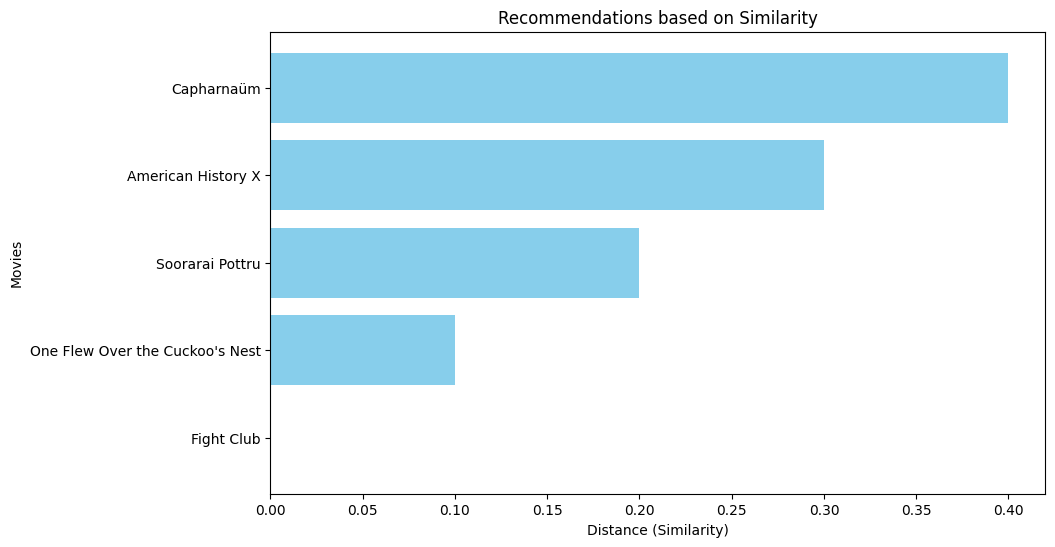

In [13]:
import matplotlib.pyplot as plt

# Example data for plotting
movies = recommended_movies
distances = distances.flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(movies[::-1], distances[::-1], color='skyblue')
plt.xlabel('Distance (Similarity)')
plt.ylabel('Movies')
plt.title('Recommendations based on Similarity')
plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top
plt.show()


3.TAKING THE USER INPUT AND PREDICTING THE MOVIE JUST BY PLOT USING VECTORS

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'imdb_top_1000.csv'
df = pd.read_csv(file_path)

# Combine plot and lead actor's name
df['Plot_Actor'] = df['Overview'] + ' ' + df['Star1']

# Encode movie titles as labels
label_encoder = LabelEncoder()
df['Movie_Label'] = label_encoder.fit_transform(df['Series_Title'])

# Select input and output features
X = df['Plot_Actor']
y = df['Movie_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
# Get all unique labels
# Evaluate the model
# Get all unique labels
all_labels = sorted(label_encoder.classes_)

# Create classification report with all labels included
print(classification_report(y_test, y_pred, labels=range(len(all_labels)), target_names=all_labels))


                                                                      precision    recall  f1-score   support

                                                (500) Days of Summer       0.00      0.00      0.00         0
                                                        12 Angry Men       0.00      0.00      0.00         0
                                                    12 Years a Slave       0.00      0.00      0.00         1
                                                                1917       0.00      0.00      0.00         0
                                               2001: A Space Odyssey       0.00      0.00      0.00         0
                                                            21 Grams       0.00      0.00      0.00         1
                                                           25th Hour       0.00      0.00      0.00         1
                                                    28 Days Later...       0.00      0.00      0.00         0
         

/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/

In [23]:
def predict_movie(plot, actor, model, vectorizer, label_encoder):
    input_text = plot + ' ' + actor
    input_tfidf = vectorizer.transform([input_text])
    pred_label = model.predict(input_tfidf)
    movie_title = label_encoder.inverse_transform(pred_label)
    return movie_title[:3]

# Example usage
plot_example = "Batman bankrupts and falls down but rises at end"
actor_example = "Christian Bale"
predicted_movie = predict_movie(plot_example, actor_example, svm_model, vectorizer, label_encoder)
print(f'Predicted Movie: {predicted_movie}')


Predicted Movie: ['Batman Begins']


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
file_path = 'imdb_top_1000.csv'
df = pd.read_csv(file_path)

# Combine plot and lead actor's name
df['Plot_Actor'] = df['Overview'] + ' ' + df['Star1']

# Encode movie titles as labels
label_encoder = LabelEncoder()
df['Movie_Label'] = label_encoder.fit_transform(df['Series_Title'])

# Select input and output features
X = df['Plot_Actor']
y = df['Movie_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Function to predict movie based on plot and actor
def predict_movie(plot, actor, model, vectorizer, label_encoder):
    input_text = plot + ' ' + actor
    input_tfidf = vectorizer.transform([input_text])
    pred_label = model.predict(input_tfidf)
    movie_titles = label_encoder.inverse_transform(pred_label)
    return movie_titles[:3]  # Return top 3 predictions

# Interactive usage to take user input
while True:
    plot_example = input("Enter the plot description: ")
    actor_example = input("Enter the actor's name: ")

    predicted_movies = predict_movie(plot_example, actor_example, svm_model, vectorizer, label_encoder)
    print(f'Predicted Movies: {predicted_movies}')

    # Ask if the user wants to continue or exit
    cont = input("Do you want to predict another movie? (yes/no): ").lower()
    if cont != 'yes':
        break


Predicted Movies: ['The Dark Knight']
